Plots adversary win rate at varying board sizes.

In [1]:
import pathlib
from typing import Tuple

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
from sgfmill.sgf import Sgf_game

import utils
from sgf_parser import game_info

plt.style.use(
    [
        "tableau-colorblind10",
        utils.get_style("default"),
        utils.get_style("2-col"),
        # utils.get_style("small-legend"),
    ]
)

In [2]:
# cp505-v8192 vs. cp505-v8192 games.
victim_vs_self_game_paths = game_info.find_sgf_files(
    pathlib.Path(
        "/nas/ucb/k8/go-attack/match/ttseng-cp505-v8192-vs-self-bsz-sweep-20230131"
    )
)
victim_vs_self_games = utils.flatten_2d_list(
    [
        game_info.read_and_parse_file(
            path,
            fast_parse=True,
            # We're just specifying an arbitrary victim color so that the parsing
            # function doesn't complain about there being no victim in these games.
            victim_color="b",
        )
        for path in victim_vs_self_game_paths
    ]
)
df = pd.DataFrame(victim_vs_self_games)
df["black_win"] = df.win_color == "b"

Black win rate:
board_size
7     100.0
8     100.0
9      98.0
10      8.0
11     67.0
12     62.0
13     45.0
14     38.0
15     61.0
16     53.0
17     62.0
18     42.0
19     56.0
Name: black_win, dtype: float64


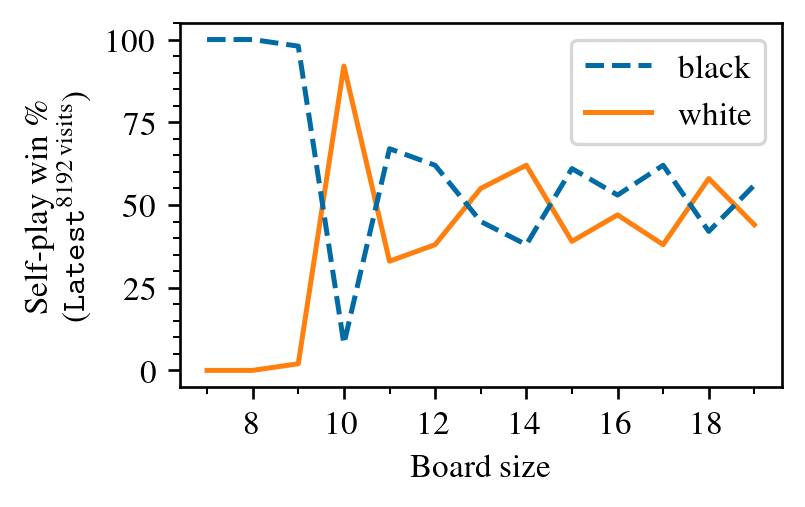

In [3]:
def set_ticks():
    locator = matplotlib.ticker.MaxNLocator(integer=True)
    plt.gca().xaxis.set_major_locator(locator)
    minor_locator = matplotlib.ticker.MultipleLocator(1)  # put minor ticks at every integer
    plt.gca().xaxis.set_minor_locator(minor_locator)

print("Black win rate:")
black_win_proportions = df.groupby("board_size").mean(numeric_only=True).black_win
black_win_rates = 100 * black_win_proportions
print(black_win_rates)
fig, ax = plt.subplots(1, 1)
black_win_rates.plot(label="black", zorder=10, linestyle="--")
(100 - black_win_rates).plot(label="white")
plt.ylim(-5, 105)
ax.minorticks_on()
plt.ylabel(f"Self-play win \\%\n" + r"($\texttt{Latest}^\mathrm{8192\,visits}$)")
plt.xlabel("Board size")
ax.legend()
set_ticks()
fig.savefig("win-rate-vs-board-size-cp505-v8192.pgf", backend="pgf")

In [4]:
def plot_adv_win_rate_by_board_size(
    df: pd.DataFrame,
    victim_label: str,
    adv_name: str,
) -> Tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]:
    """Plot adversary win rate vs. varying board size.

    Args:
        df: Dataframe of games.
        victim_label: The label to give the victim on the plot.
        adv_name: "Pass" or "Cyclic"
    """
    print("Win rate:")
    win_proportions = (
        df.groupby(["adv_color", "board_size"]).mean(numeric_only=True).adv_win
    )
    win_rates = 100 * win_proportions
    print(win_rates)

    fig, ax = plt.subplots(1, 1)
    win_rates["b"].plot(label="adv. = black", zorder=10, linestyle="--")
    win_rates["w"].plot(label="adv. = white")
    plt.ylim(-5, 105)
    ax.minorticks_on()
    plt.ylabel(f"{adv_name}-adv. win \\%\nvs. {victim_label}")
    plt.xlabel("Board size")
    ax.legend()

    set_ticks()

    return fig, ax

In [5]:
df = utils.parse_sgfs(["/nas/ucb/k8/go-attack/match/ttseng-s34m-bsz-sweep-20230124"])

Win rate:
adv_color  board_size
b          7              31.0
           8              23.0
           9              84.0
           10             99.0
           11             99.0
           12            100.0
           13            100.0
           14            100.0
           15            100.0
           16            100.0
           17            100.0
           18             99.0
           19            100.0
w          7             100.0
           8             100.0
           9             100.0
           10            100.0
           11            100.0
           12            100.0
           13            100.0
           14            100.0
           15            100.0
           16            100.0
           17            100.0
           18            100.0
           19            100.0
Name: adv_win, dtype: float64


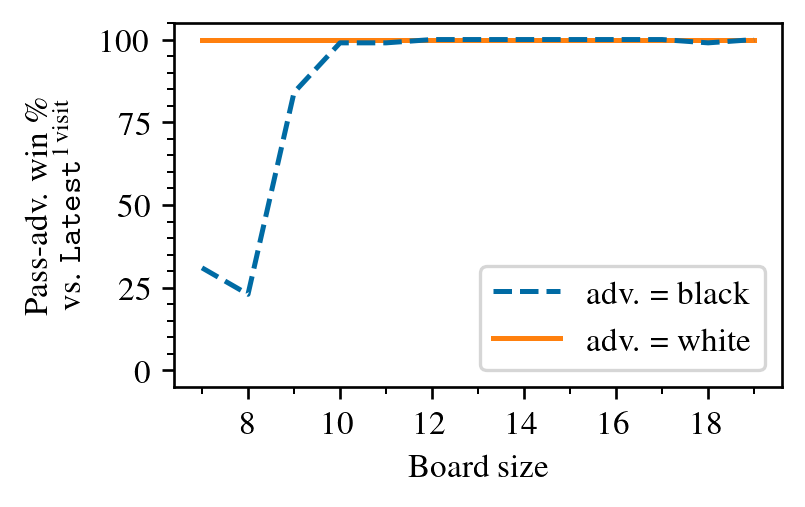

In [6]:
fig, _ = plot_adv_win_rate_by_board_size(
    df,
    r"$\texttt{Latest}^\mathrm{1\, visit}$",
    adv_name="Pass",
)
fig.savefig("win-rate-vs-board-size-s34m.pgf", backend="pgf")

In [7]:
df = utils.parse_sgfs(
    ["/nas/ucb/k8/go-attack/match/ttseng-hard-s545m-bsz-sweep-20221206"]
)
df = df.query("adv_name.str.contains('v600')")

Win rate:
adv_color  board_size
b          7              98.0
           8               0.0
           9               0.0
           10              0.0
           11              0.0
           12             52.0
           13             58.0
           14             76.0
           15             96.0
           16             90.0
           17             94.0
           18             94.0
           19            100.0
w          7               0.0
           8               0.0
           9               0.0
           10              0.0
           11              0.0
           12             56.0
           13             68.0
           14             76.0
           15             84.0
           16            100.0
           17             96.0
           18             94.0
           19             94.0
Name: adv_win, dtype: float64


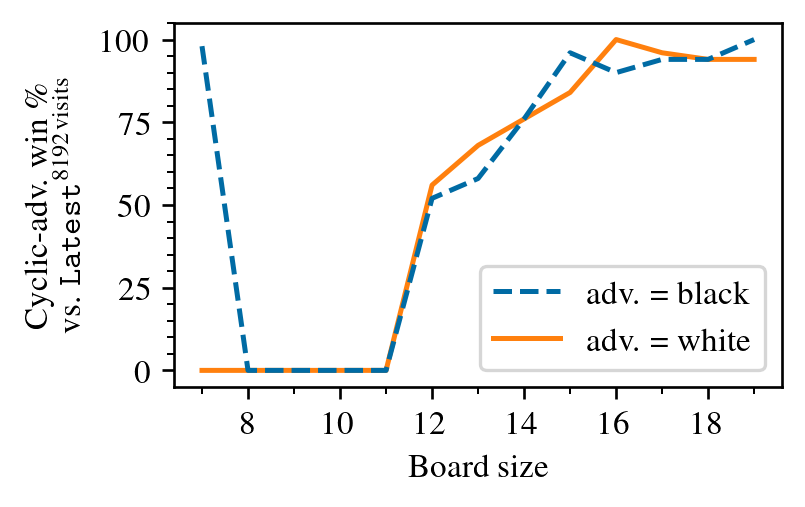

In [8]:
fig, _ = plot_adv_win_rate_by_board_size(
    df,
    r"$\texttt{Latest}^\mathrm{8192\,visits}$",
    adv_name="Cyclic",
)
fig.savefig("win-rate-vs-board-size-s545m.pgf", backend="pgf")